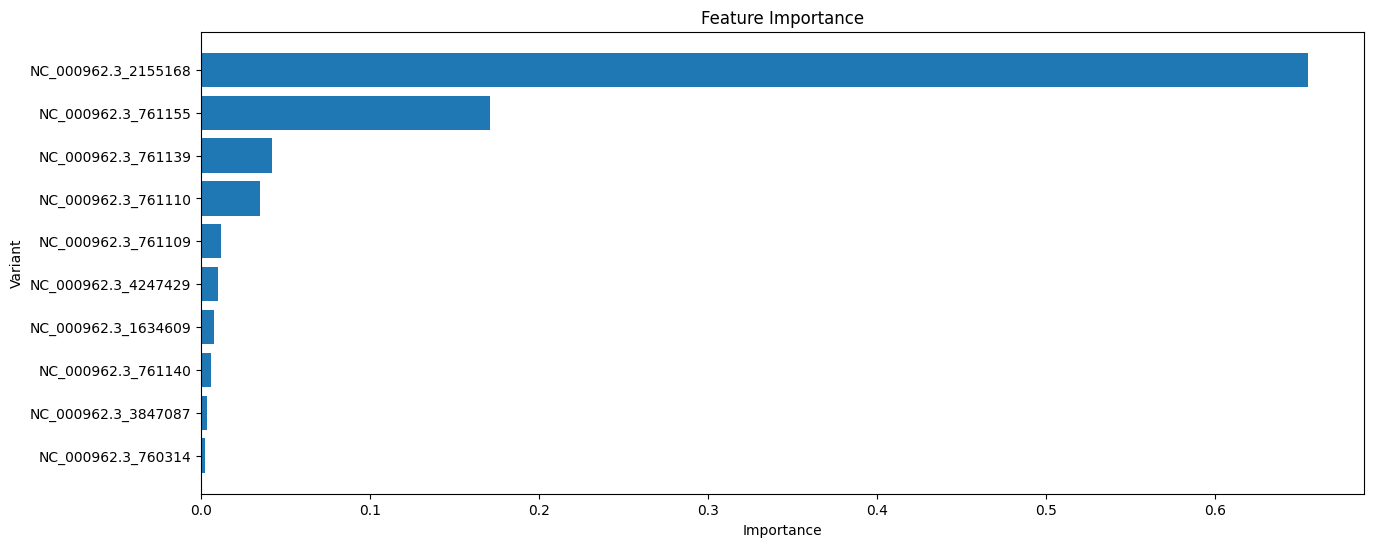

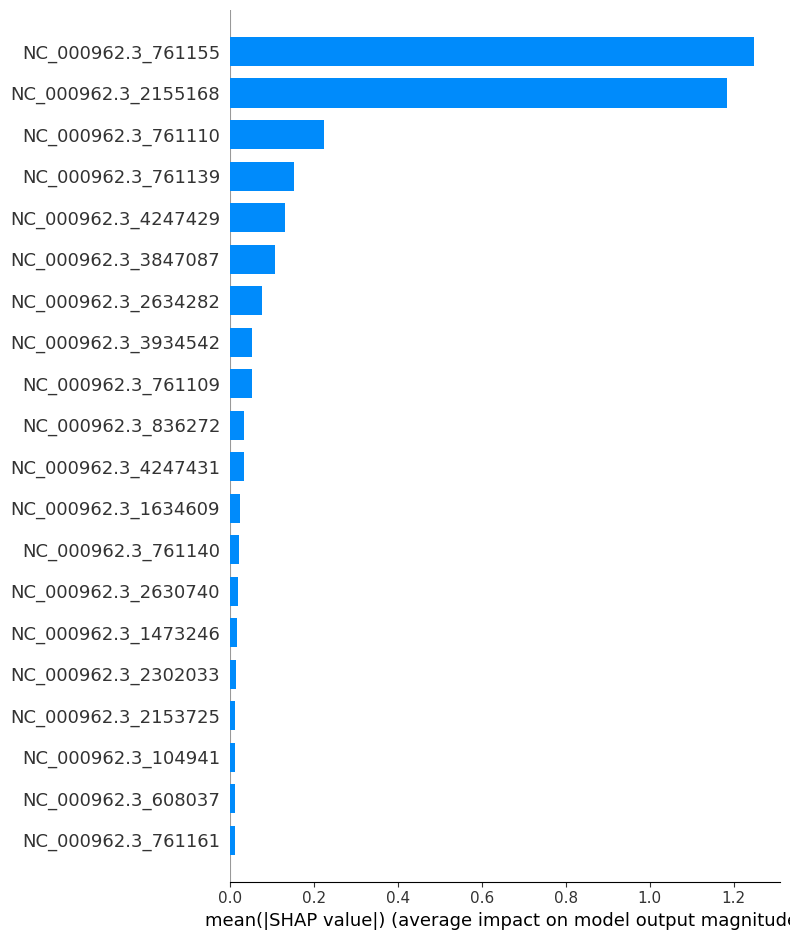

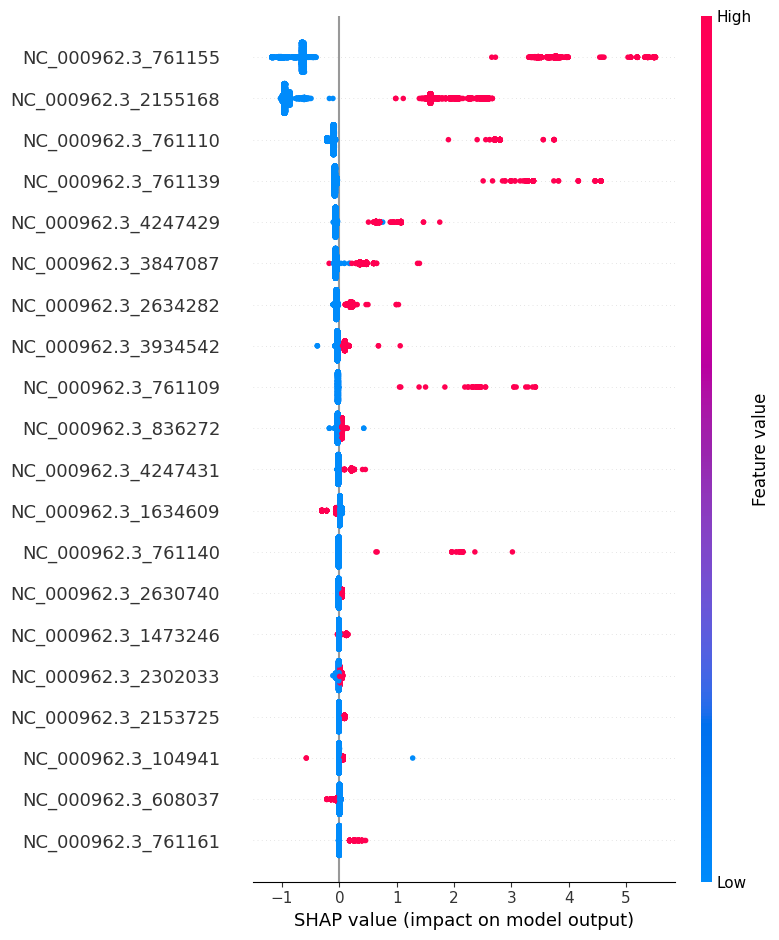

In [10]:
#The optimal Model Importances,SHAP,SHAP summary and force plot 

import pandas as pd
import numpy as np

import shap
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingClassifier


def Model_plot():
    Train_data = pd.read_csv(Train)
    data2pre = pd.read_csv(Predict)
    # #Split data into features and labels
    Train_data_X = Train_data.iloc[:, 1:-1] 
    Train_data_Y = Train_data.iloc[:,-1] # last column label
    data2pre_X = data2pre.iloc[:, 1:-1]
    
    # 设置 matplotlib 的样式为白色背景
    plt.style.use('default')  # 先恢复默认样式
    plt.rcParams['axes.facecolor'] = 'white'  # 设置背景颜色为白色
    plt.rcParams['figure.facecolor'] = 'white'  # 设置图形背景颜色为白色
    #Load the Optimal model GBC
    import pickle
    model = pickle.load(open(Classifiers, 'rb'))
    
    #Figure 2B i) feature_importances

    feature_importances = model.feature_importances_
    feature_names = Train_data_X.columns 
    feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
    feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)
    # Plot feature_importances
    plt.figure(figsize=(15, 6))
    plt.barh(feature_importance_df['feature'][:10], feature_importance_df['importance'][:10])  # Top15
    plt.xlabel('Importance')
    plt.ylabel('Variant')
    plt.title('Feature Importance')
    plt.gca().invert_yaxis() 
    plt.show()

        # 设置 matplotlib 的样式为白色背景
    plt.style.use('default')  # 先恢复默认样式
    plt.rcParams['axes.facecolor'] = 'white'  # 设置背景颜色为白色
    plt.rcParams['figure.facecolor'] = 'white'  # 设置图形背景颜色为白色
    #Figure 2B ii) SHAP value
    explainer = shap.TreeExplainer(model)
    shap_values = shap.TreeExplainer(model).shap_values(Train_data_X)
    shap_values2 = explainer(data2pre_X)
    shap.summary_plot(shap_values,Train_data_X, plot_type="bar")
    # 显示图形
    plt.show()

    #Figure 2B iii)：SHAP summary_plot
            # 设置 matplotlib 的样式为白色背景
    plt.style.use('default')  # 先恢复默认样式
    plt.rcParams['axes.facecolor'] = 'white'  # 设置背景颜色为白色
    plt.rcParams['figure.facecolor'] = 'white'  # 设置图形背景颜色为白色
    shap.summary_plot(shap_values, Train_data_X) 
    # 显示图形
    plt.show()

#antibiotics_model
antb_Classifiers = {'rifampicin': 'GBC'}

for antb, Classifiers in antb_Classifiers.items():
    
    #Import amr-ast data from github repository
    Train = f'../Data/{antb}.csv'
    #Import bacterial strains without caapenemase from github repository
    Predict = f'../Data/{antb}_to_predict_MTB.csv'
    
    Classifiers = f'../example/{antb}_{Classifiers}.sav'
    
    Model_plot()
    


In [4]:
data = pd.read_csv('../Data/rifampicin.csv')
data2pre = pd.read_csv('../Data/rifampicin_to_predict_MTB.csv')
# #Split data into features and labels
Train_data_X = data.iloc[:, 1:-1] 
data2pre_X = data2pre.iloc[:, 1:-1]
Train_data_Y = data.iloc[:,-1] # last column label

import pickle
model = pickle.load(open('../example/rifampicin_GBC.sav', 'rb'))

#Figure 2B iv)：force_plots for single isolate
explainer = shap.TreeExplainer(model)
shap_values = shap.TreeExplainer(model).shap_values(Train_data_X)
shap_values2 = explainer(data2pre_X)
shap.initjs()
shap.plots.force(shap_values2[44]) # The index 44 